# Exploratory Data Analysis

In [7]:
import numpy as np#used for numerical operations, especially working with arrays, matrices, and mathematical functions
import pandas as pd#used for data manipulation and analysis—loading datasets, cleaning, and transforming data.
import matplotlib.pyplot as plt#used for plotting graphs and visualizations like line plots, bar plots, histograms, etc
import seaborn as sns#used for making attractive and informative statistical plots easily
sns.set_style('darkgrid')#adds a dark grid background to plots, making them easier to read

In [11]:
df = pd.read_csv("Telco-Customer-Churn.csv")#reads the CSV file and stores it in a DataFrame named df
df.head()#displays the first 5 rows of the DataFrame to give a quick preview

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
df.shape#returns a tuple: (rows, columns)

(7043, 21)

In [15]:
df.isna().sum()#returns summary Series showing how many missing (NaN) values are present in each column of dataset

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Analysis

We do not need customer ID in our analysis as it does not help us predict whether the cutomer will churn or not also, it increases the dimensionality.

In [17]:
df.drop(["customerID"], inplace = True, axis = 1)#customerID column is permanently removed from df, reducing useless dimensionality in your churn prediction model

In [19]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Visualizing the proportion of each target class (like Churn: Yes/No) across categories of a given feature using a stacked bar chart

In [21]:
def stacked_plot(df, group, target):#function to generate a stacked plots between two variables
    fig, ax = plt.subplots(figsize = (6,4))#creates a figure and axes object with size 6x4 inches
    temp_df = (df.groupby([group, target]).size()/df.groupby(group)[target].count()).reset_index().pivot(columns=target, index=group, values=0)
    #to calculate the percentage of each target class(e.g., Churn = Yes/No) within each group category (e.g., Contract type), and reshape the result for plotting
    temp_df.plot(kind='bar', stacked=True, ax = ax, color = ["green", "darkred"])#plot a stacked bar chart on the given axes
    ax.xaxis.set_tick_params(rotation=0)
    ax.set_xlabel(group)#label the x-axis with the group name
    ax.set_ylabel('Churn Percentage')#label the y-axis as "Churn Percentage"

### Gender, SeniorCitizen, Partner, Dependents

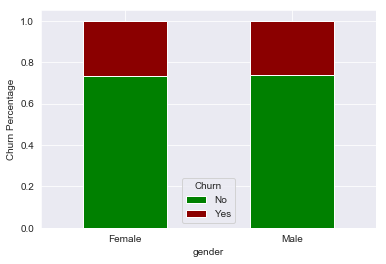

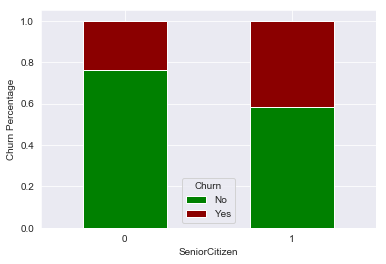

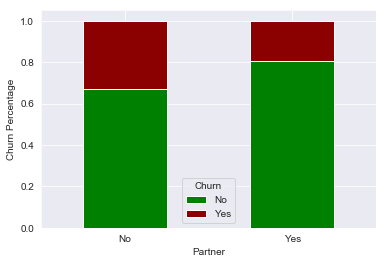

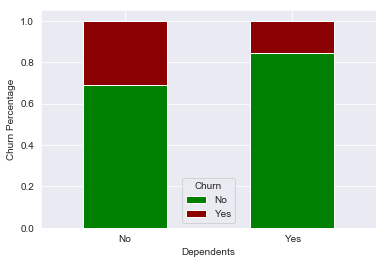

In [8]:
#visualize churn distribution across different customer features
#shows churn rates for each gender (Male/Female). Helps answer: "Do men or women churn more?"
stacked_plot(df, "gender", "Churn")         
#shows churn rates based on senior citizen status (0 = No, 1 = Yes). Helps answer: "Are senior citizens more likely to churn?"
stacked_plot(df, "SeniorCitizen", "Churn")  
#shows churn rates for customers with or without a partner. Helps answer: "Does having a partner affect churn?"
stacked_plot(df, "Partner", "Churn")  
#shows churn rates for customers with or without dependents. Helps answer: "Do people with dependents churn less or more?"
stacked_plot(df, "Dependents", "Churn")     

In [68]:
#count churn values for non-senior citizens who have both a partner and dependents
df[(df.SeniorCitizen == 0) & (df.Partner == 'Yes') & (df.Dependents == 'Yes')].Churn.value_counts()

Churn
No     1437
Yes     229
Name: count, dtype: int64

In [70]:
#count churn values for non-senior citizens who have a partner but no dependents
df[(df.SeniorCitizen == 0) & (df.Partner == 'Yes') & (df.Dependents == 'No')].Churn.value_counts()

Churn
No     921
Yes    242
Name: count, dtype: int64

In [72]:
#count churn values for non-senior citizens who do not have a partner but have dependents
df[(df.SeniorCitizen == 0) & (df.Partner == 'No') & (df.Dependents == 'Yes')].Churn.value_counts()

Churn
No     278
Yes     75
Name: count, dtype: int64

In [74]:
#count churn values for non-senior citizens who have neither a partner nor dependents
df[(df.SeniorCitizen == 0) & (df.Partner == 'No') & (df.Dependents == 'No')].Churn.value_counts()

Churn
No     1872
Yes     847
Name: count, dtype: int64

### Tenure

In [80]:
df['tenure'].describe()#to get a quick statistical summary of customer tenure values — useful for understanding customer retention patterns

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

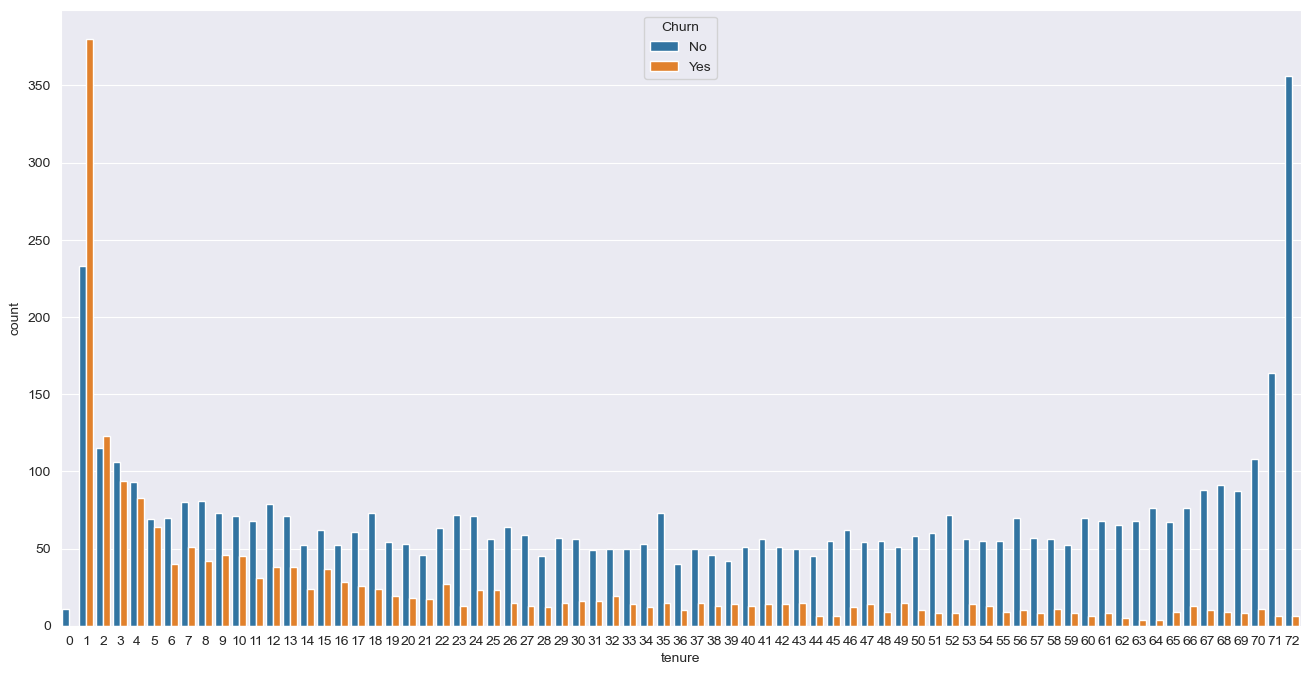

In [84]:
#create a new figure for the plot with a large size (16 inches wide, 8 inches tall)
plt.figure(figsize=(16,8))

#create a count plot showing the number of customers at each tenure value
#x="tenure": X-axis represents tenure in months (0 to 72)
#hue="Churn": Bars are color-coded by churn status (Yes/No)
#data=df: Use the Telco churn dataset
sns.countplot(x="tenure", hue="Churn", data=df)

#display the plot
plt.show()


Obseravtions:
1. Very high churn (orange bar) occurs at tenure = 1 month — many customers leave soon after joining.
2. As tenure increases, churn gradually decreases.
3. Customers who have stayed longer (higher tenure) are less likely to churn.
4. Especially at high tenure values (60–72 months), almost all customers stay loyal (mostly blue bars).

--> Conclusion:
The longer a customer stays with the company, the less likely they are to leave. This means customer loyalty increases with time.

## Grouping 'tenure' into 6 categorical ranges

In [94]:
#define a function to convert tenure (in months) into one of 6 categorical groups
def tenure(t):
    if t <= 12:
        return 1           #group 1: Tenure between 0–12 months
    elif t > 12 and t <= 24:
        return 2           #group 2: Tenure between 13–24 months
    elif t > 24 and t <= 36:
        return 3           #group 3: Tenure between 25–36 months
    elif t > 36 and t <= 48:
        return 4           #group 4: Tenure between 37–48 months
    elif t > 48 and t <= 60:
        return 5           #group 5: Tenure between 49–60 months
    else:
        return 6           #group 6: Tenure above 60 months (61–72)

#apply the tenure() function to each row's 'tenure' value and create a new column 'tenure_group'
df["tenure_group"] = df["tenure"].apply(lambda x: tenure(x))

In [96]:
df["tenure_group"].value_counts()#returns the count of customers in each tenure_group

tenure_group
1    2186
6    1407
2    1024
3     832
5     832
4     762
Name: count, dtype: int64

<Axes: xlabel='tenure_group', ylabel='count'>

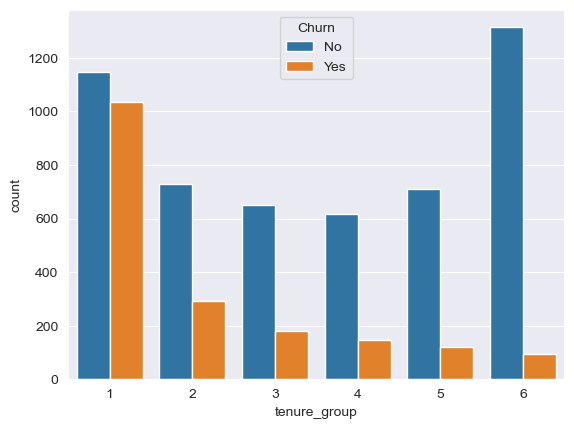

In [98]:
#Creates a count plot showing the number of customers in each tenure_group, 
#split by Churn status (Yes/No), to visualize how churn varies across different tenure ranges.
sns.countplot(x="tenure_group", hue="Churn", data=df)

### Phone Service and MultipleLines 

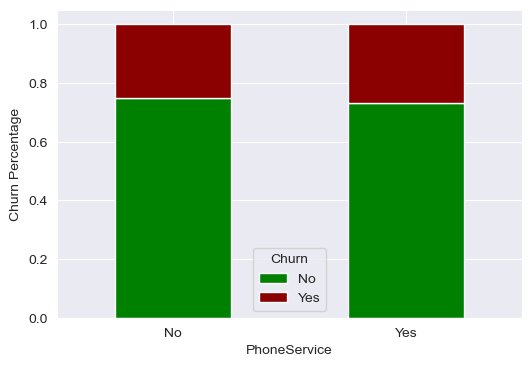

In [102]:
#creates a stacked bar chart showing how Churn (Yes/No) varies based on whether the customer has Phone Service
stacked_plot(df, "PhoneService", "Churn")

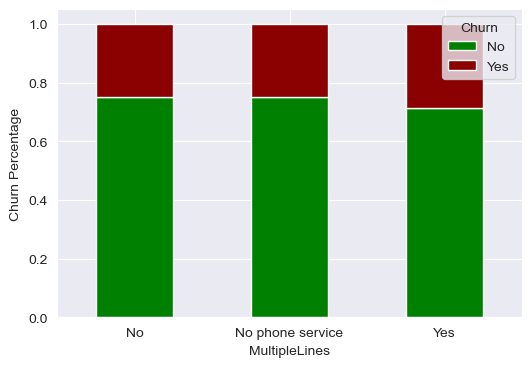

In [104]:
#plots a stacked bar chart to show the relationship between the MultipleLines feature and Churn
stacked_plot(df, "MultipleLines", "Churn")

### OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies

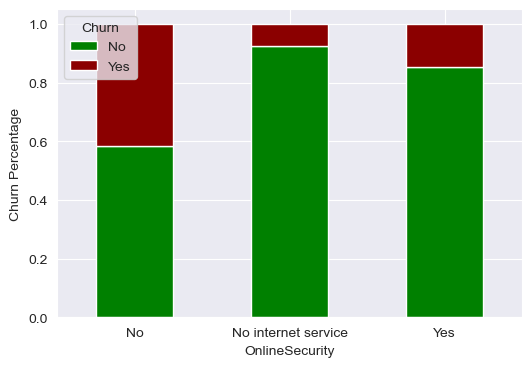

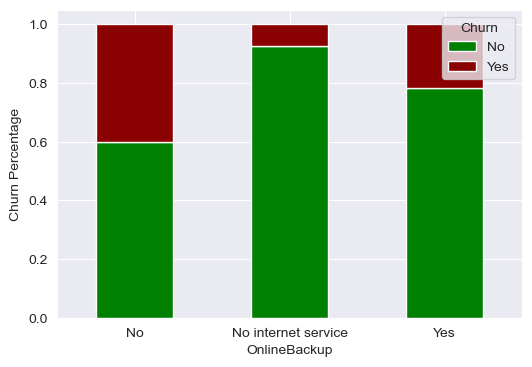

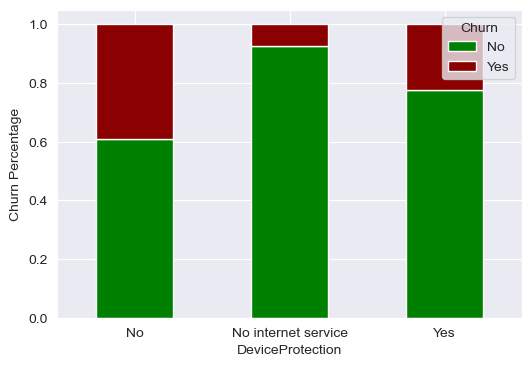

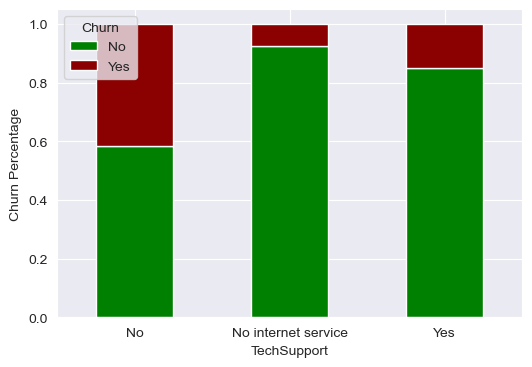

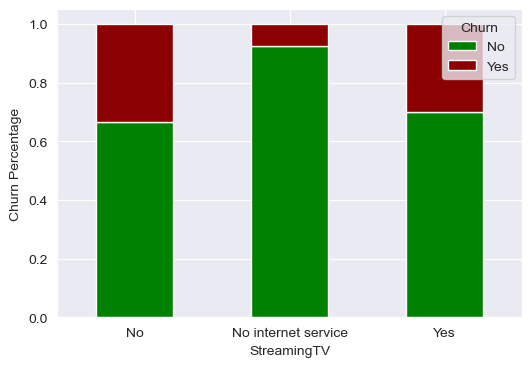

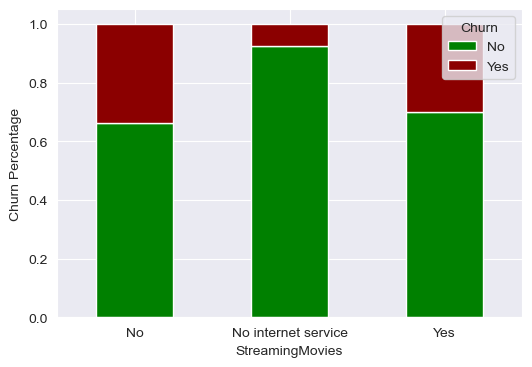

In [113]:
#plot churn distribution based on whether customers have Online Security
stacked_plot(df, "OnlineSecurity", "Churn")

#plot churn distribution based on whether customers use Online Backup service
stacked_plot(df, "OnlineBackup", "Churn")

#plot churn distribution based on whether customers have Device Protection
stacked_plot(df, "DeviceProtection", "Churn")

#plot churn distribution based on whether customers receive Tech Support
stacked_plot(df, "TechSupport", "Churn")

#plot churn distribution based on whether customers use Streaming TV services
stacked_plot(df, "StreamingTV", "Churn")

#plot churn distribution based on whether customers use Streaming Movies services
stacked_plot(df, "StreamingMovies", "Churn")

### Tenure Distribution by Online Security Service Subscription

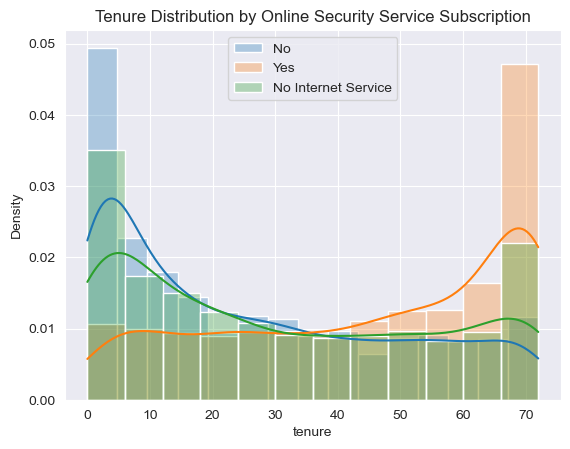

In [122]:
# plot the tenure distribution for customers without Online Security
sns.histplot(df.tenure[df.OnlineSecurity == "No"], kde=True, stat="density", label="No", alpha=0.3)
# plot the tenure distribution for customers with Online Security
sns.histplot(df.tenure[df.OnlineSecurity == "Yes"], kde=True, stat="density", label="Yes", alpha=0.3)
# plot the tenure distribution for customers with no internet service (hence no Online Security option)
sns.histplot(df.tenure[df.OnlineSecurity == "No internet service"], kde=True, stat="density", label="No Internet Service", alpha=0.3)
# add a title to the plot to indicate the purpose
plt.title("Tenure Distribution by Online Security Service Subscription")
# show the legend using the labels defined earlier
plt.legend()
# display the final plot
plt.show()

### Tenure Distribution by Streaming TV Service Subscription

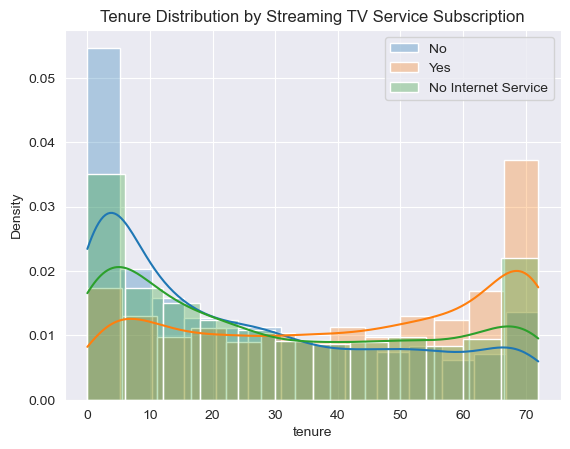

In [130]:
#plot the tenure distribution for customers without Streaming TV
sns.histplot(df.tenure[df.StreamingTV == "No"], kde=True, stat="density", label="No", alpha=0.3)
#plot the tenure distribution for customers with Streaming TV
sns.histplot(df.tenure[df.StreamingTV == "Yes"], kde=True, stat="density", label="Yes", alpha=0.3)
#plot the tenure distribution for customers with no internet service (hence no Streaming TV option)
sns.histplot(df.tenure[df.StreamingTV == "No internet service"], kde=True, stat="density", label="No Internet Service", alpha=0.3)
#add a title to the plot to indicate the purpose
plt.title("Tenure Distribution by Streaming TV Service Subscription")
#show the legend using the labels defined earlier
plt.legend()
#display the final plot
plt.show()

### Tenure Distribution by Streaming Movies Service Subscription

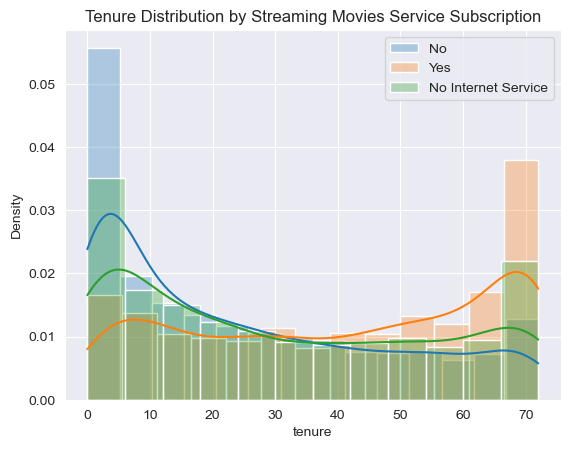

In [133]:
#plot the tenure distribution for customers without Streaming Movies
sns.histplot(df.tenure[df.StreamingMovies == "No"], kde=True, stat="density", label="No", alpha=0.3)
#plot the tenure distribution for customers with Streaming Movies
sns.histplot(df.tenure[df.StreamingMovies == "Yes"], kde=True, stat="density", label="Yes", alpha=0.3)
#plot the tenure distribution for customers with no internet service (hence no Streaming Movies option)
sns.histplot(df.tenure[df.StreamingMovies == "No internet service"], kde=True, stat="density", label="No Internet Service", alpha=0.3)
#add a title to the plot to indicate the purpose
plt.title("Tenure Distribution by Streaming Movies Service Subscription")
# show the legend using the labels defined earlier
plt.legend()
# display the final plot
plt.show()

### InternetService

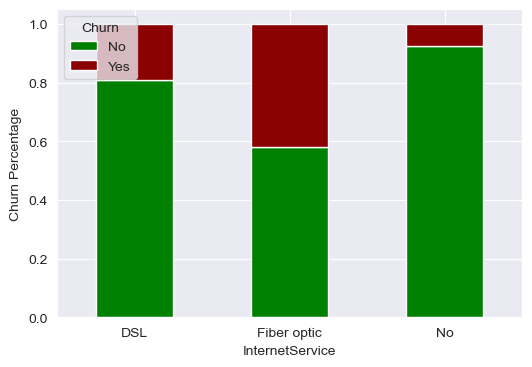

In [136]:
stacked_plot(df, "InternetService", "Churn")#generates a stacked bar plot that shows how customer churn rates vary based on their type of Internet service

<Axes: xlabel='InternetService', ylabel='count'>

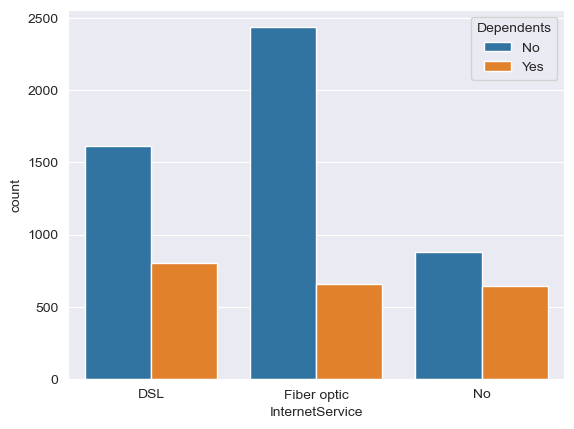

In [140]:
# plot the count of each InternetService type, split by whether the customer has dependents
sns.countplot(x="InternetService", hue="Dependents", data=df)

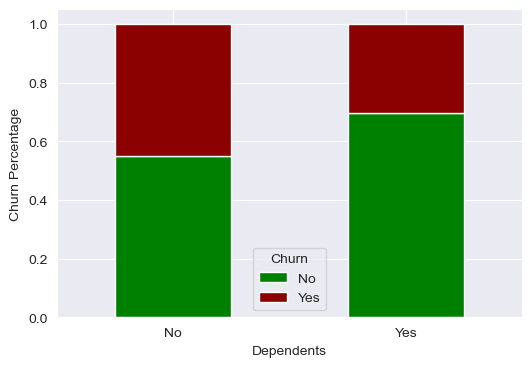

In [142]:
#visualize the churn rate among Fiber optic users, broken down by whether they have dependents or not.
stacked_plot(df[df.InternetService == "Fiber optic"], "Dependents", "Churn")

<Axes: xlabel='InternetService', ylabel='count'>

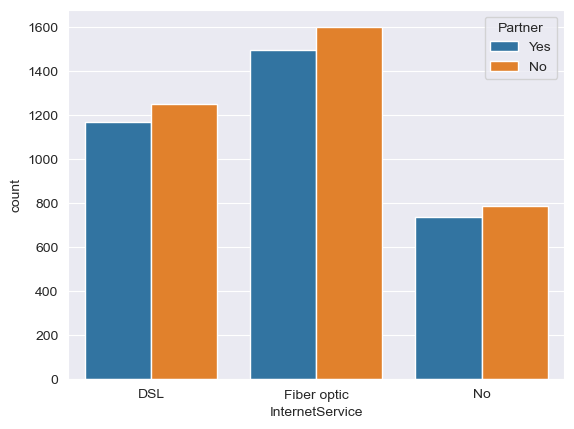

In [146]:
#to compare the distribution of internet service types among customers with and without partners
sns.countplot(x="InternetService", hue="Partner", data=df)

<Axes: xlabel='InternetService', ylabel='count'>

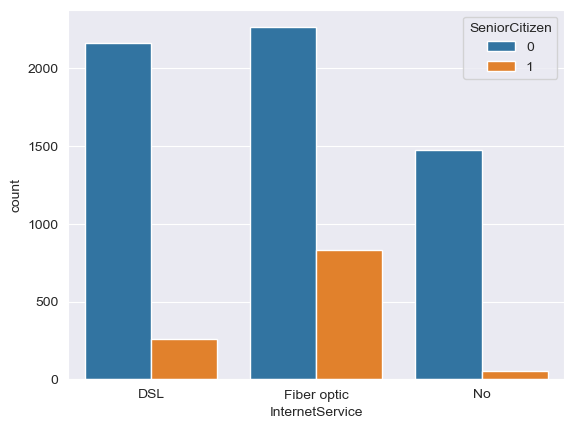

In [148]:
#plot the count of each InternetService type, split by whether the customer is a Senior Citizen
sns.countplot(x="InternetService", hue="SeniorCitizen", data=df)

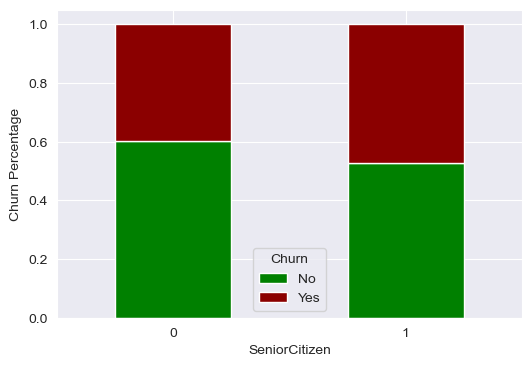

In [150]:
#filter the DataFrame to include only customers who use Fiber optic internet
#then plot churn distribution based on whether they are Senior Citizens or not
stacked_plot(df[df.InternetService == "Fiber optic"], "SeniorCitizen", "Churn")

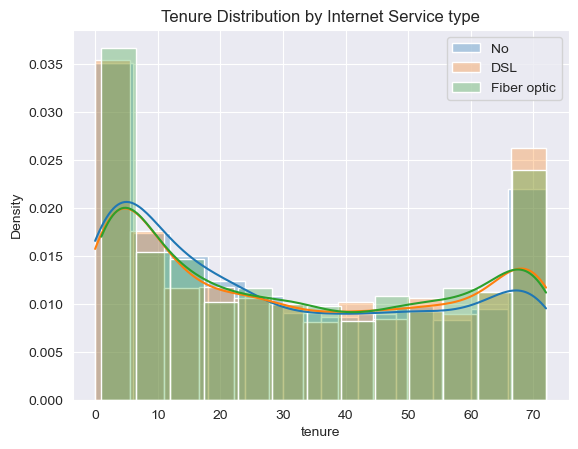

In [158]:
# plot the tenure distribution for customers with No internet service
sns.histplot(df.tenure[df.InternetService == "No"], kde=True, stat="density", label="No", alpha=0.3)
# plot the tenure distribution for customers with DSL internet
sns.histplot(df.tenure[df.InternetService == "DSL"], kde=True, stat="density", label="DSL", alpha=0.3)
# plot the tenure distribution for customers with Fiber optic internet
sns.histplot(df.tenure[df.InternetService == "Fiber optic"], kde=True, stat="density", label="Fiber optic", alpha=0.3)
# set the title of the plot
plt.title("Tenure Distribution by Internet Service type")
# show the legend to label each line
plt.legend()
# display the plot
plt.show()

## Contract

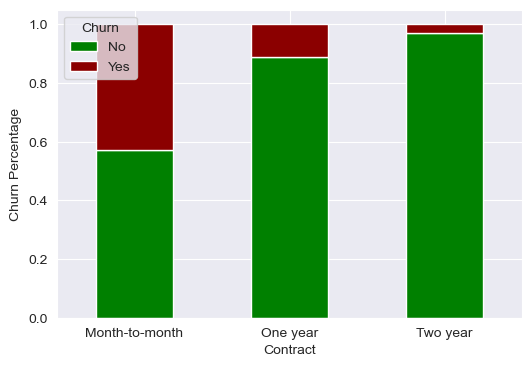

In [168]:
#plot churn distribution based on contract type using a stacked bar chart
stacked_plot(df, "Contract", "Churn")

<Axes: xlabel='InternetService', ylabel='count'>

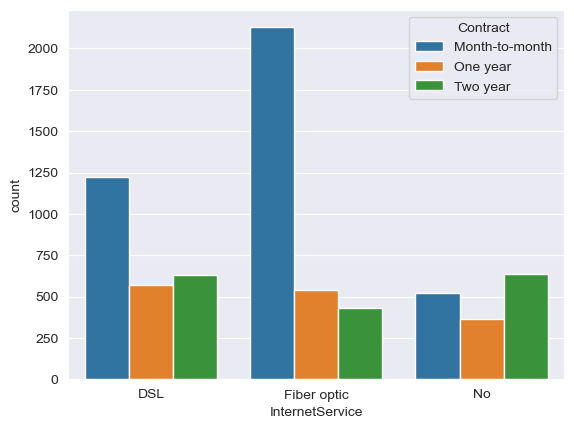

In [170]:
#plot the count of each internet service type, split by different contract types
sns.countplot(x="InternetService", hue="Contract", data=df)

### PaymentMethod

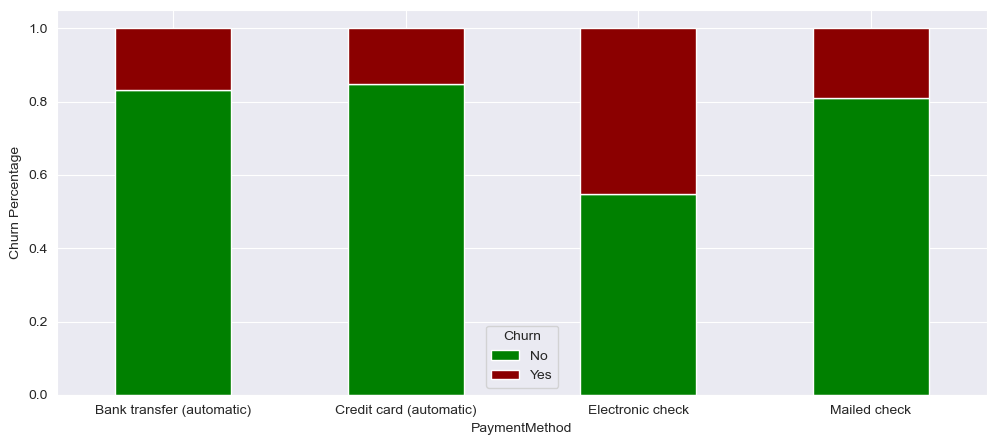

In [174]:
#set the feature to group by (x-axis of the bar plot)
group = "PaymentMethod"
#set the target variable (used for stacking — e.g., Churn = Yes/No)
target = "Churn"
#create a matplotlib figure and axes object with custom size
fig, ax = plt.subplots(figsize = (12,5))
#calculate the proportion of each churn class within each payment method category
#then reshape the result for stacked bar plotting
temp_df = (df.groupby([group, target]).size() / df.groupby(group)[target].count()) \
            .reset_index().pivot(columns=target, index=group, values=0)
#plot a stacked bar chart on the given axes object using green and dark red for Churn No/Yes
temp_df.plot(kind='bar', stacked=True, ax=ax, color=["green", "darkred"])
#rotate x-axis ticks to 0 degrees for better readability
ax.xaxis.set_tick_params(rotation=0)
#set x-axis label as the grouping variable name
ax.set_xlabel(group)
#set y-axis label to indicate we are showing churn percentage
ax.set_ylabel('Churn Percentage');

<Axes: xlabel='PaymentMethod', ylabel='count'>

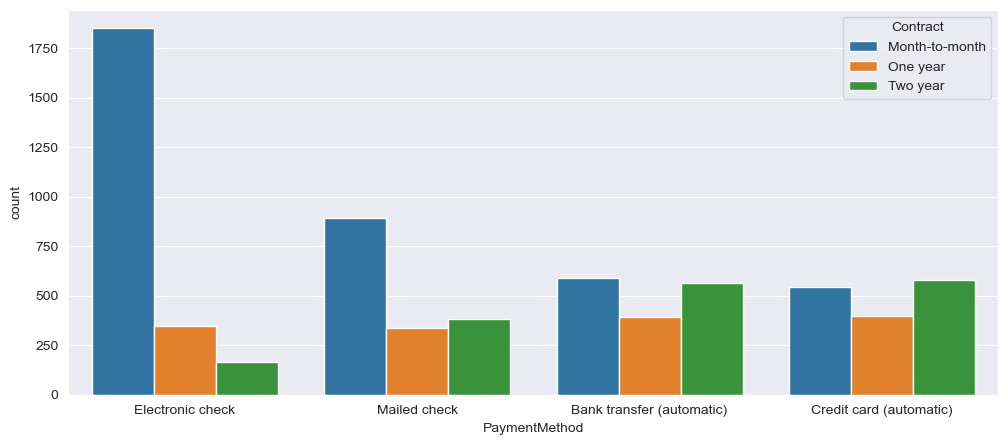

In [176]:
#create a matplotlib figure and axes object with size 12x5 inches
fig, ax = plt.subplots(figsize = (12,5))

#plot the count of each PaymentMethod category, grouped (colored) by Contract type
sns.countplot(x="PaymentMethod", hue="Contract", data=df, ax=ax)

### PaperlessBilling

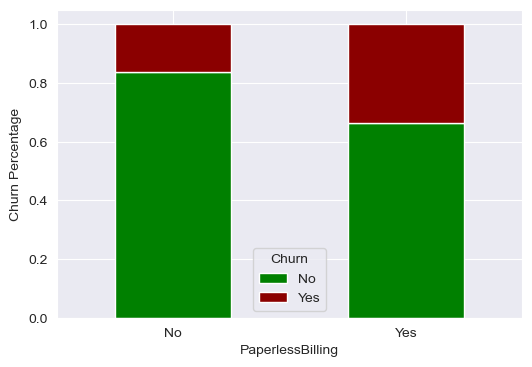

In [179]:
#plot churn distribution based on whether the customer uses paperless billing or not
stacked_plot(df, "PaperlessBilling", "Churn")

### TotalCharges

In [183]:
#display summary statistics for the TotalCharges column
df.TotalCharges.describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

In [185]:
#replace blank spaces in TotalCharges column with NaN (missing values)
df['TotalCharges'] = df["TotalCharges"].replace(" ", np.nan)
#count how many missing values are now present in TotalCharges column
df['TotalCharges'].isna().sum()

11

In [187]:
#filter and display all rows where TotalCharges is missing (i.e., is NaN)
df[df["TotalCharges"].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,...,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,1
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No,1
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,...,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No,1
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No,1
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,...,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No,1
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No,1
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No,1
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No,1
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No,1
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,...,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No,1


In [190]:
#fill missing TotalCharges with 0 where tenure is 0 (i.e., customers just joined and haven't been charged yet)
df.loc[df["TotalCharges"].isnull(), 'TotalCharges'] = 0
#check if any missing (NaN) values are left in the entire DataFrame
df.isnull().any().any()

False

In [192]:
#convert the TotalCharges column from object (string) to float data type
df['TotalCharges'] = df["TotalCharges"].astype(float)
#create a new DataFrame containing only customers who churned
Churn = df[df.Churn == "Yes"]
#create a new DataFrame containing only customers who did not churn
Not_Churn = df[df.Churn == "No"]

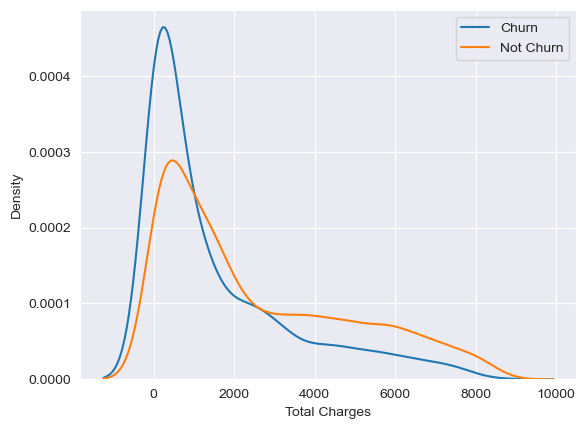

In [198]:
#create a figure and axes object for the plot
fig, ax = plt.subplots()
#plot the Kernel Density Estimate (KDE) of TotalCharges for churned customers
sns.kdeplot(Churn["TotalCharges"], label="Churn", ax=ax)
#plot the KDE of TotalCharges for non-churned customers on the same axes
sns.kdeplot(Not_Churn["TotalCharges"], label="Not Churn", ax=ax)
#label the x-axis as "Total Charges"
ax.set_xlabel("Total Charges")
#display the legend using the defined labels
plt.legend()

### Monthly Charges

In [203]:
#display summary statistics for the MonthlyCharges column
df.MonthlyCharges.describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [207]:
#count how many missing (NaN) values are present in the MonthlyCharges column
df.MonthlyCharges.isna().sum()

0

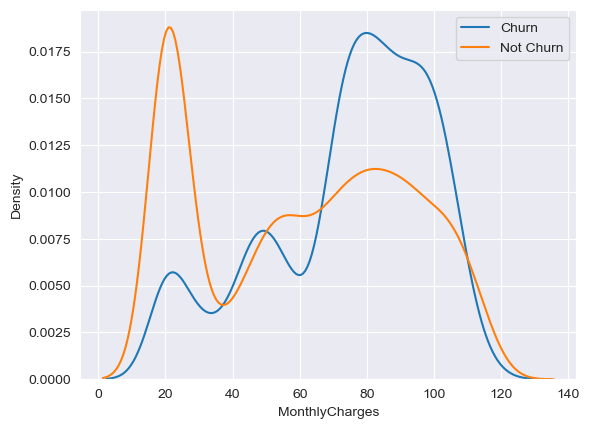

In [213]:
#plot the Kernel Density Estimate (KDE) of MonthlyCharges for churned customers
sns.kdeplot(Churn["MonthlyCharges"], label = "Churn")
#plot the KDE of MonthlyCharges for non-churned customers on the same plot
sns.kdeplot(Not_Churn["MonthlyCharges"], label = "Not Churn")
#show the legend to distinguish between the two curves
plt.legend()

### Redundancy Check

Let's see the correlation of total charges and (monthly charges x tenure) to check if we have redundant information.

In [217]:
# check the correlation between TotalCharges and the product of MonthlyCharges and tenure
np.corrcoef(df.TotalCharges, df.MonthlyCharges * df.tenure)

array([[1.        , 0.99956055],
       [0.99956055, 1.        ]])

## Fucntion to prepare data for model building based on EDA

In [224]:
#define a function to load and preprocess the Telco churn dataset
def datapreparation(filepath):

    #read the dataset from the given file name (assumes file is in same folder)
    df = pd.read_csv(filepath)

    #drop the customerID column as it does not contribute to prediction
    df.drop(["customerID"], inplace=True, axis=1)

    #replace empty strings in TotalCharges column with NaN
    df.TotalCharges = df.TotalCharges.replace(" ", np.nan)

    #fill missing TotalCharges values with 0 (using assignment to avoid chained warning)
    df["TotalCharges"] = df["TotalCharges"].fillna(0)

    #convert TotalCharges column to float type for numerical analysis
    df.TotalCharges = df.TotalCharges.astype(float)

    #define columns with "Yes"/"No" binary values that can be encoded as 1/0
    cols1 = ['Partner', 'Dependents', 'PaperlessBilling', 'Churn', 'PhoneService']

    #convert Yes/No to 1/0 for each column in cols1
    for col in cols1:
        df[col] = df[col].apply(lambda x: 0 if x == "No" else 1)

    #encode gender column: Male as 0, Female as 1
    df.gender = df.gender.apply(lambda x: 0 if x == "Male" else 1)

    #map MultipleLines column: No/No phone service → 0, Yes → 1
    df.MultipleLines = df.MultipleLines.map({'No phone service': 0, 'No': 0, 'Yes': 1})

    #define columns with internet-related services to encode
    cols2 = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

    #map No/No internet service → 0, Yes → 1 for each column in cols2
    for col in cols2:
        df[col] = df[col].map({'No internet service': 0, 'No': 0, 'Yes': 1})

    #create dummy variables for InternetService, Contract, and PaymentMethod columns (drop_first=True to avoid dummy trap)
    df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)

    #return the cleaned and encoded dataframe
    return df

#call the function using the filename only (since the file is in the same folder)
df = datapreparation("Telco-Customer-Churn.csv")

In [227]:
df.to_csv("Telco-Customer-Churn-Cleaned.csv", index=False)